In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

In [58]:
def model(x, params):
    u = x.dot(params)
    return np.log(1+np.exp(u))

def nloglike(params, x, y):
    res = (y - model(x, params))
    return 0.5*(res*res).sum()
    
def minit(p0, args):
    return minimize(nloglike, p0, args=args)

In [59]:
np.random.seed(42)
cov = np.load('/mnt/data1/BispectrumGLAM/redcov.npz').T
is_low = cov[:, -1] < 0.3
cov_high = cov[~is_low, :]
is_low_sub = np.random.choice(np.argwhere(is_low).flatten(), replace=False, size=cov_high.shape[0]//2)
cov_low = cov[is_low_sub, :]
cov_sub = np.concatenate([cov_low, cov_high])
#cov_sub = np.random.permutation(cov_sub)
print(cov_sub.shape, cov.shape)

(420, 7) (3378700, 7)


In [60]:
#--- regression
# linear

y = cov_sub[:, -1]
x = np.column_stack([np.ones(cov_sub.shape[0]), cov_sub[:, :-1], cov_sub[:, :-1]**2, cov_sub[:, :-1]**3, cov_sub[:, :-1]**4])
res = minit(np.random.normal(size=x.shape[1]), args=(x, y))
assert res.success
cov_pred = model(x, res.x)

Text(0.5, 0, 'reduced covariance')

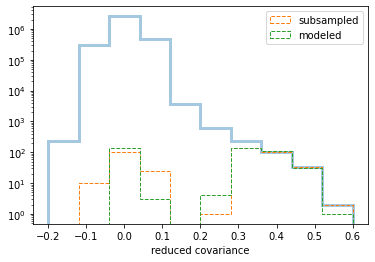

In [61]:
kw = dict(histtype='step', range=(-0.2, 0.6))
plt.hist(cov[:, -1], alpha=0.4, lw=3, **kw)
plt.hist(cov_sub[:, -1], label='subsampled', ls='--', **kw)
plt.hist(cov_pred, label='modeled', ls='--', **kw)
plt.yscale('log')
plt.legend()
plt.xlabel('reduced covariance')

Text(0, 0.5, 'reduced cov')

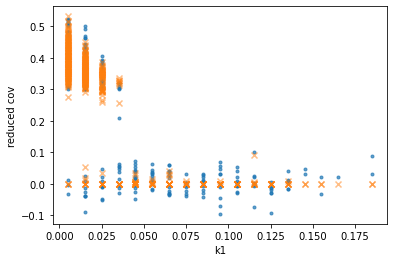

In [62]:
plt.scatter(cov_sub[:, 0], y, marker='.', alpha=0.7)
plt.scatter(cov_sub[:, 0], cov_pred, alpha=0.5, marker='x')
plt.xlabel('k1')
plt.ylabel('reduced cov')

Text(0, 0.5, 'reduced cov')

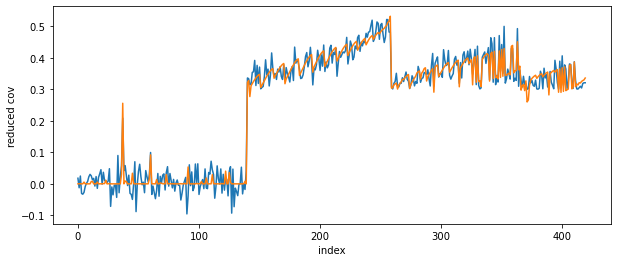

In [63]:
plt.figure(figsize=(10, 4))
plt.plot(y)
plt.plot(cov_pred)
plt.xlabel('index')
plt.ylabel('reduced cov')

Text(0, 0.5, 'reduced cov')

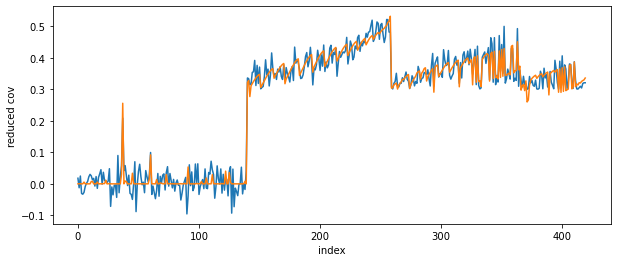

In [64]:
plt.figure(figsize=(10, 4))
plt.plot(y)
plt.plot(cov_pred)
plt.xlabel('index')
plt.ylabel('reduced cov')

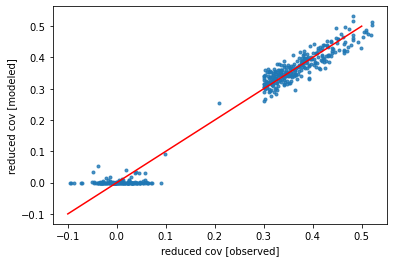

In [65]:
plt.scatter(y, cov_pred, marker='.', alpha=0.8)
plt.xlabel('reduced cov [observed]')
plt.ylabel('reduced cov [modeled]')
plt.plot([-0.1, 0.5], [-0.1, 0.5],'r')

In [66]:
np.corrcoef(y, cov_pred)

array([[1.        , 0.98696606],
       [0.98696606, 1.        ]])

In [67]:
((y-cov_pred)**2).mean()

0.0008338822738081027

In [68]:
((y-y.mean())**2).mean() # baseline approach, i.e., the covariance is constant

0.032124879902074445

In [69]:
cov.shape

(3378700, 7)

In [70]:
x_n = np.column_stack([np.ones(cov.shape[0]), cov[:, :-1], cov[:, :-1]**2, cov[:, :-1]**3, cov[:, :-1]**4])

Text(0, 0.5, 'reduced cov')

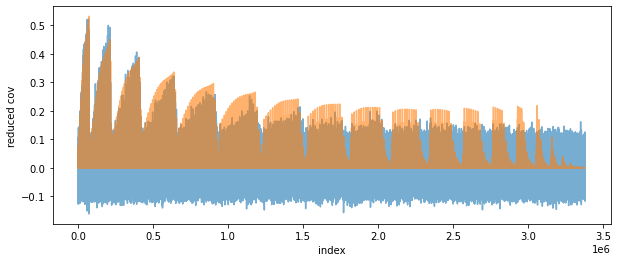

In [71]:
plt.figure(figsize=(10, 4))
plt.plot(cov[:, -1], alpha=0.6)
plt.plot(model(x_n, res.x), alpha=0.6)
plt.xlabel('index')
plt.ylabel('reduced cov')

In [ ]:
# to do
# invert this matrix
# reproduce Jay's joint sigma (using mock covariance) w/o hartlap .. try to push kmax=0.3, & kmin=0